In [1]:
from os import listdir
from os.path import isfile, join
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# creating list of all companies we have in the dataset
path = 'stocks/'
all_company_names = [f for f in listdir(path) if isfile(join(path, f))]
all_company_names.sort()
print("We have total",len(all_company_names),"companies")

We have total 7196 companies


In [3]:
# company_names = list
# stocks_file = list of all thee companies
def convert_txt_to_dataframe(company_names,all_company_names):
    for company_name in company_names:
        company_name = company_name + '.us.txt'
        if company_name in all_company_names:
            print("{} found. converting to pandas dataframe".format(company_name))
            df = pd.read_csv("stocks/{}".format(company_name),delimiter=",")
            df = df.reset_index()
            splt_company_name = company_name.split(".")
            # print(splt_company_name[0])
            path = 'csv_stock/{}.csv'.format(splt_company_name[0])
            df.to_csv(path,index=False)
            print("Done.")
        else:
            print("{} in our stock list".format(company_name))
            break

In [4]:
company_names = ['aapl','msft','amzn','googl','fb']

In [5]:
convert_txt_to_dataframe(company_names,all_company_names)

aapl.us.txt found. converting to pandas dataframe
Done.
msft.us.txt found. converting to pandas dataframe
Done.
amzn.us.txt found. converting to pandas dataframe
Done.
googl.us.txt found. converting to pandas dataframe
Done.
fb.us.txt found. converting to pandas dataframe
Done.


In [6]:
# creating list of all csv we have 
path_csv = 'csv_stock/'
all_csv = [f for f in listdir(path_csv) if isfile(join(path_csv, f))]
all_csv.sort()
print("We have total",len(all_csv)-1,"csv files")

We have total 5 csv files


In [7]:
# this function loads the csv files and extract 'index' and 'close' column and turn them into numpy array
def get_time_series_list_company_wise(all_csv):
    all_csv_list = list()
    for each_csv in all_csv:
        if each_csv.endswith('.csv'):
            each_csv_list = list()
            print(each_csv)
            data = pd.read_csv('csv_stock/{}'.format(each_csv))
            df_time = data[['index']]
            df_series = data[['Close']]
            time = df_time.to_numpy()
            series = df_series.to_numpy()
            each_csv_list.append(time)
            each_csv_list.append(series)
            print(len(each_csv_list))
            all_csv_list.append(each_csv_list)
    return all_csv_list

In [8]:
list_ts = get_time_series_list_company_wise(all_csv) 

aapl.csv
2
amzn.csv
2
fb.csv
2
googl.csv
2
msft.csv
2


(8364, 1)


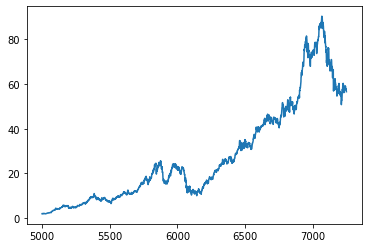

In [9]:
time = list_ts[0][0]
series = list_ts[0][1]

print(series.shape)

# plotting the time(x) vs series(y) 
# plt.figure(figsize=(10, 6))
# plt.plot(time,series)

plt.plot(time[5000:7250],series[5000:7250])

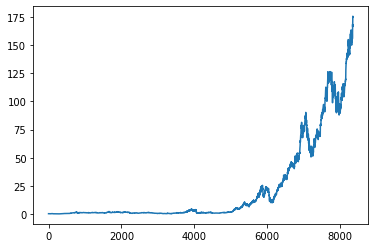

In [10]:
plt.plot(time,series)


In [11]:
# split into training and validation
split = 7390
time_train = time[4000:split]
time_val = time[split:]
series_train = series[4000:split]
series_val = series[split:]

print("Time Train: ", time_train.shape)
print("Series Train: ", time_train.shape)
print("Time Validation: ", time_val.shape)
print("Series Validation: ", series_val.shape)

Time Train:  (3390, 1)
Series Train:  (3390, 1)
Time Validation:  (974, 1)
Series Validation:  (974, 1)


In [12]:
# a = time_train.reshape((-1,))
# a.shape

In [13]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [14]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [15]:
# train_set = windowed_dataset(series_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

In [16]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
#                       input_shape=[None]),
#   tf.keras.layers.SimpleRNN(40, return_sequences=True),
#   tf.keras.layers.SimpleRNN(40),
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
# ])

In [17]:
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))

In [18]:
# optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
# model.compile(loss= tf.keras.losses.Huber(),
#               optimizer=optimizer,
#               metrics=["mae"])
# history = model.fit(train_set, epochs=80, callbacks=[lr_schedule])

In [19]:
# plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([1e-8, 1e-4, 0, 30])

In [171]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(series_train, window_size = 36, batch_size=64, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(10),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs = 120)

Epoch 1/120
53/53 [==============================] - 1s 27ms/step - loss: 27.3740 - mae: 27.8703
Epoch 2/120
53/53 [==============================] - 1s 27ms/step - loss: 4.3967 - mae: 4.8680
Epoch 3/120
53/53 [==============================] - 1s 26ms/step - loss: 2.2012 - mae: 2.6564
Epoch 4/120
53/53 [==============================] - 1s 25ms/step - loss: 1.6448 - mae: 2.0703
Epoch 5/120
53/53 [==============================] - 1s 28ms/step - loss: 1.4032 - mae: 1.8333
Epoch 6/120
53/53 [==============================] - 1s 27ms/step - loss: 1.1518 - mae: 1.5718
Epoch 7/120
53/53 [==============================] - 1s 28ms/step - loss: 0.9070 - mae: 1.3115
Epoch 8/120
53/53 [==============================] - 2s 29ms/step - loss: 0.9439 - mae: 1.3501
Epoch 9/120
53/53 [==============================] - 1s 28ms/step - loss: 0.9403 - mae: 1.3416
Epoch 10/120
53/53 [==============================] - 1s 28ms/step - loss: 0.8816 - mae: 1.2851
Epoch 11/120
53/53 [===========================

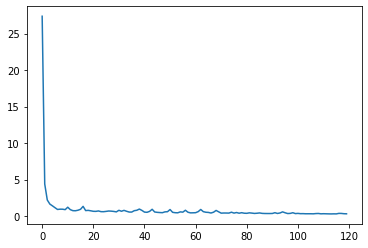

In [172]:
loss=history.history['loss']
epochs=range(len(loss))


loss_zoom = loss[50:]
epochs_zoom = epochs[50:]

plt.plot(epochs,loss)
# plt.plot(epochs_zoom,loss_zoom)

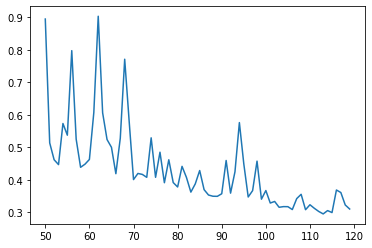

In [173]:
plt.plot(epochs_zoom,loss_zoom)

In [174]:
forecast= []
for time in range(len(series) - window_size):
    # print(time,time + window_size)
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))


len(forecast)
forecast_val = forecast[split-window_size:]
results_val = np.array(forecast_val)[:, 0, 0]

In [175]:
forecast_train = forecast[4000:split]
results_train = np.array(forecast_train)[:, 0, 0]

print(len(forecast))
print(len(forecast_val))
print(len(forecast_train))
print(results_train.shape)

8344
974
3390
(3390,)


In [176]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

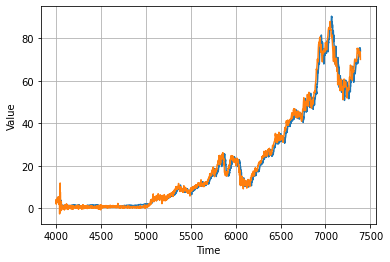

In [177]:
plot_series(time_train, series_train)
plot_series(time_train, results_train)

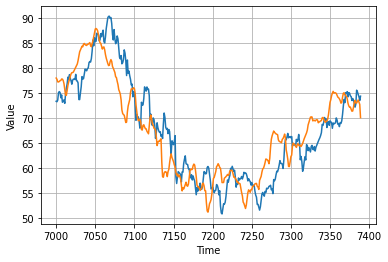

In [178]:
plot_series(time_train[3000:], series_train[3000:])
plot_series(time_train[3000:], results_train[3000:])

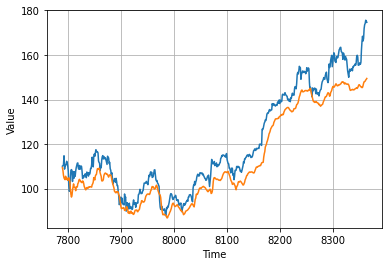

In [179]:
plot_series(time_val[400:], series_val[400:])
plot_series(time_val[400:], results_val[400:])

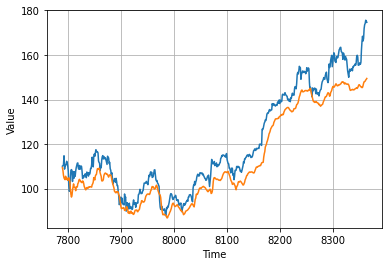

In [180]:
plot_series(time_val[400:], series_val[400:])
plot_series(time_val[400:], results_val[400:])

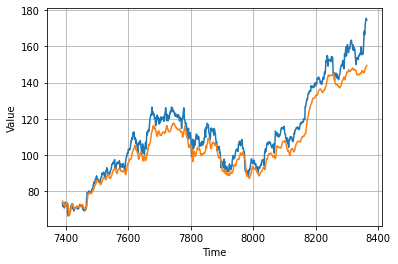

In [181]:
plot_series(time_val, series_val)
plot_series(time_val, results_val)

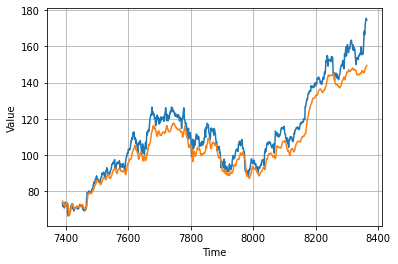

In [160]:
plot_series(time_val, series_val)
plot_series(time_val, results_val)